<a href="https://colab.research.google.com/github/Fonzzy1/LLM-Workshop/blob/main/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
execute:
  cache: true
jupyter: python3

---

<a href="https://colab.research.google.com/github/Fonzzy1/LLM-Workshop/blob/main/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LLMs for Communications Methods**
##### Presented at the ADM+S 2026 Summer School as the interactive component of
# **Integrating LLMs into communication research methods: Possibilities, assumptions and risks**


This session will provide users with a hands-on opportunity to see how language models can be integrated into communications research, and what possibilities and risks this presents.

<br>

*Authors: Alfie Chadwick and Laura Vodden*



---

# **🔨 Part 1. Setting up**



### **1.1 Housekeeping**

**Before you proceed**

The default runtime type of Colab instances is CPU based. We will need to change our runtime type to **T4 GPU** or better.
Change this by either going to **Runtime > Change runtime type**

*or*

by going to the tiny arrow in the top right corner of your browser and selecting ***Change runtime type**.

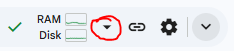

While running your script be mindful of the resources you're using. This can be tracked in the same menu at **View resources**.

Source [here](https://colab.research.google.com/github/5aharsh/collama/blob/main/Ollama_Setup.ipynb#scrollTo=o2ghppmRDFny).



### **1.2 Set up ollama environment, and install and import libraries**
This should only take a minute or two.

In [ ]:
#| eval: false
!sudo apt update
!sudo apt install -y pciutils zstd
!curl -fsSL https://ollama.com/install.sh | sh
!pip install ollama kagglehub kagglehub[pandas-datasets] pandas

# Fancy little subprocess trick to get ollama working in Colab workbooks
import subprocess
proccess = subprocess.Popen(['ollama', 'serve'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, stdin=subprocess.DEVNULL, close_fds=True)

import pandas as pd
pd.set_option('display.max_colwidth', None)

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,309 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:10 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,882 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-bac

### **1.3 Model selection**

We are going to be using **four** Large Language Models today:
* Llama
* Qwen
* Gemma
* Deepseek



All of these models are **open source**, and all but Gemma are the same size.  
However, they will exhibit slight differences when we ask them the same
question.

For other models check https://ollama.com/library

<br>


> 🏃 **Run the cell below** to 'pull' our models from the ollama library. This could take up to 3 minutes.

In [ ]:
#| eval: false
!ollama pull llama3.1:8b
!ollama pull qwen3:8b
!ollama pull gemma3:4b
!ollama pull deepseek-r1:8b

print('Done!')





Done!


---

# **🤖 Part 2. Interacting with LLMs in Python**

Unlike interacting with a chat client online, using LLMs in Python is much more
flexible but takes a little time to set up.

In Python we can create **functions** - repeatable pieces of code using the `def`
syntax. We can pass **arguments** to these functions, which change how the function behaves.

Below is a function that takes two arguments:
    1.a **prompt**; and
    2.the name of the **model** we want to use

<br>

> 🏃 **Run the cell below** to **define** the **function**. We will **call** this function later.

In [ ]:
import ollama

def query_llm(prompt, model):
    """
    Given a 'prompt' and the name of a model,
    return the LLM's text response (uses ollama SDK).
    Because the model has a default, we don't need to be explicit in which model
    to use if you don't want to.
    """
    # Send the request to Ollama and get the response
    response = ollama.chat(
        model=model, messages=[{"role": "user", "content": prompt}]
    )
    # Return ONLY the LLM's textual answer from the response
    return response.message.content

### **2.1 Running the LLMs**
Now that we have **defined** a working **function**, we can look at some responses from the different
models.

<br>

> ✍ Change the **prompt** in the cell below to something that is within your field of expertise - but try to ask for a brief response.

In [ ]:
# Examples (ctrl+/ to use):
# prompt = 'What is the role of performance in australian parliamentary debates'
# prompt = 'Briefly tell me: What does a cat say?'
prompt = 'In 100 words or less: What is the definition of framing in communication science?'

We can now go and ask what each model says in response using the function that
was defined above.

<br>


> 🏃 **Run the cell below** to **call** the function. The function **returns** a **response**, based on these arguments.

In [ ]:
rows = []

for model in ['llama3.1:8b', 'qwen3:8b', 'gemma3:4b', 'deepseek-r1:8b']:
    print(f"{model} is analysing your question...\n")

    answer = query_llm(prompt, model)

    rows.append({
        "model": model,
        "response": answer
    })

test_df = pd.DataFrame(rows)

test_df


llama3.1:8b is analysing your question...

qwen3:8b is analysing your question...

gemma3:4b is analysing your question...

deepseek-r1:8b is analysing your question...



,model,response
0,llama3.1:8b,"In communication science, ""framing"" refers to the way information is presented and interpreted. It involves selecting and organizing data to create a specific mental model or meaning for an audience. Frames can influence how people think about and react to messages by focusing attention on certain aspects while ignoring others. For example, presenting a health issue as a risk versus a benefit can significantly impact how individuals perceive it. Framing is a powerful tool in communication because it shapes the way people construct reality and make decisions. It's a key concept in fields like persuasion, public policy, and marketing."
1,qwen3:8b,"Framing in communication science refers to the process of selecting and emphasizing specific aspects of a message to shape perception and influence interpretation. It involves contextualizing information, highlighting key elements, and downplaying others to align with a particular perspective or goal. Framing is a strategic tool used to guide audience understanding, often affecting attitudes and decisions by reframing issues in ways that resonate with cultural, political, or social contexts. It underscores how presentation shapes meaning, making the same information appear differently based on framing. (95 words)"
2,gemma3:4b,"In communication science, “framing” refers to how information is presented to influence how an audience perceives and understands an issue. It’s not about the content itself, but *how* it’s packaged – the words, images, and context used. \n\nFraming shapes our interpretations by highlighting certain aspects and downplaying others, ultimately guiding our judgments and opinions. Essentially, it’s the art of directing attention and suggesting meaning."
3,deepseek-r1:8b,"Framing is how communicators structure information to shape perception. It involves selecting specific details, emphasizing certain aspects, and choosing descriptive language. This strategic organization influences how audiences interpret an issue, event, or message, highlighting particular meanings while downplaying others. By doing so, framing directs attention and subtly guides the audience's understanding and response to the communicated content."


### **2.2 Visualising the outputs**

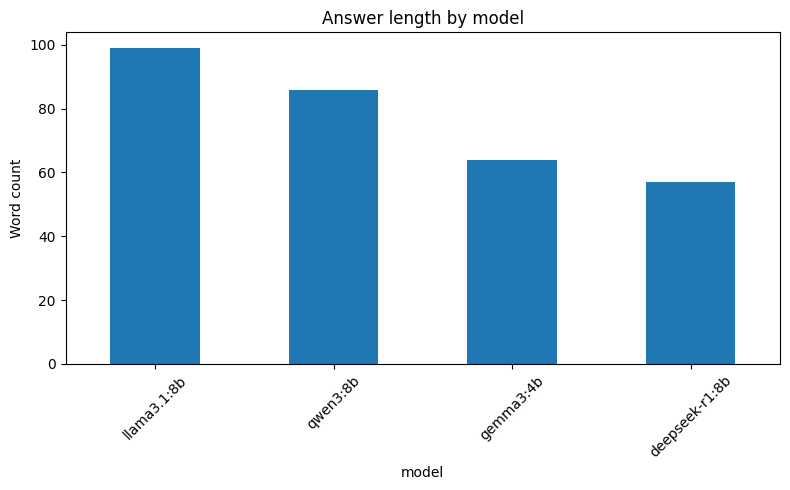

In [ ]:
import matplotlib.pyplot as plt

# Compute word counts for each model
word_counts = test_df.set_index('model')['response'].apply(lambda x: len(x.split()))

# Plot
word_counts.plot(kind="bar", figsize=(8,5))
plt.ylabel("Word count")
plt.title("Answer length by model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import re
from collections import Counter

# Simple stopword list
stop_words = {
    "the", "and", "of", "e", "g", "vs", "to", "s", "a", "in", "is", "it", "that", "as",
    "for", "with", "on", "by", "this", "are", "or", "an", "be",
    "from", "at", "which", "but", "not", "have", "has", "their",
    "its", "also", "can", "how", "such", "frame", "framing", "frames"
}

top_n = 10
rows = []

# Loop over the dataframe rows
for _, row in test_df.iterrows():
    model = row['model']
    text = row['response'].lower()

    # Extract words
    words = re.findall(r"\b[a-zA-Z]+\b", text)
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    # Count top words
    counts = Counter(words).most_common(top_n)

    for rank, (word, count) in enumerate(counts, start=1):
        rows.append({
            "model": model,
            "rank": rank,
            "word_count": f"{word} ({count})"
        })

# Create dataframe
top_words_df = pd.DataFrame(rows)

# Pivot to horizontal format
wide_df = top_words_df.pivot(index='model', columns='rank', values='word_count')
wide_df.columns = [f"top_{col}" for col in wide_df.columns]
wide_df.reset_index(inplace=True)

wide_df


,model,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10
0,deepseek-r1:8b,communicators (1),structure (1),information (1),shape (1),perception (1),involves (1),selecting (1),specific (1),details (1),emphasizing (1)
1,gemma3:4b,our (2),communication (1),science (1),refers (1),information (1),presented (1),influence (1),audience (1),perceives (1),understands (1)
2,llama3.1:8b,communication (2),way (2),people (2),science (1),refers (1),information (1),presented (1),interpreted (1),involves (1),selecting (1)
3,qwen3:8b,information (2),communication (1),science (1),refers (1),process (1),selecting (1),emphasizing (1),specific (1),aspects (1),message (1)


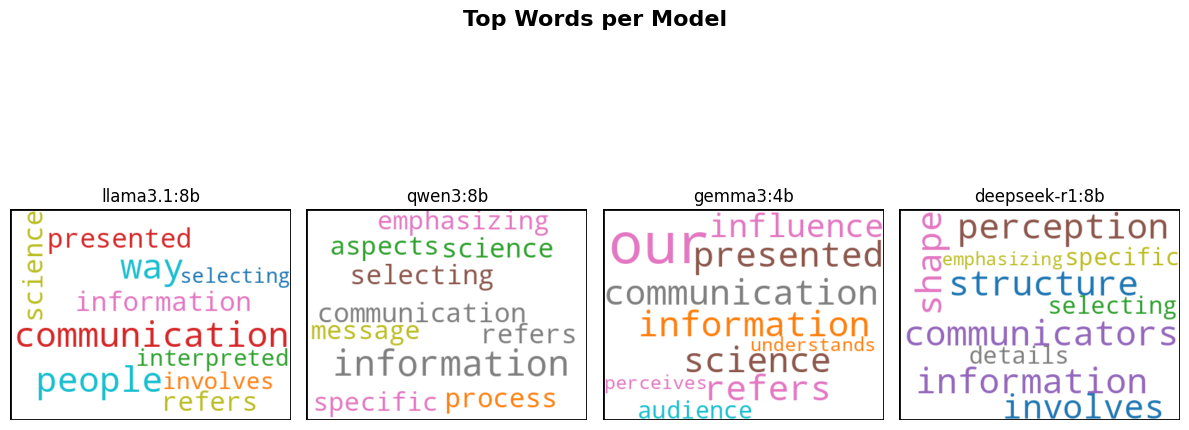

In [ ]:
from wordcloud import WordCloud
from matplotlib.patches import Rectangle

# Iterate over each model and make a word cloud
models = top_words_df['model'].unique()
plt.figure(figsize=(12, 6))

for i, model in enumerate(models, 1):
    top_words = top_words_df[top_words_df['model'] == model].set_index('word')['count'].to_dict()

    ax = plt.subplot(1, len(models), i)
    wc = WordCloud(
        width=400,
        height=300,
        background_color='white',
        colormap='tab10'
    ).generate_from_frequencies(top_words)

    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(model)

    # Add border rectangle
    rect = Rectangle(
        (0, 0), 1, 1, transform=ax.transAxes,
        fill=False, edgecolor='black', linewidth=2
    )
    ax.add_patch(rect)

plt.suptitle("Top Words per Model", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # leave space for the suptitle
plt.show()


### **🧐 Questions**


> *  What did the models get **right**, and what did they get **wrong**?
> *  How did the response **differ** between the different models?
> *  Which model gave the 'best' response, and **why** do you think that?
> *  Is this kind of output **useful**?


Try playing with a couple of
different questions or different ways of wording the questions to see if you get
different results.


---

# **📓 Part 3. Using LLMs for communication research**

While we can use LLMs for question-answering tasks, as we did before, they are particularly for the **'busy work'** of research.


Tasks such as data **cleaning**, **labelling**, **classification** and **extraction** are relatively straightforward to automate and **validate**. By automating such processes, we can work with much larger datasets and address research questions at a different scale than would typically be feasible using manual methods.


While these approaches enable new analytical **possibilities**, they also introduce **risks** that warrant careful consideration. We will keep this in mind as we work through the following examples.



<br>



### **☝ Example: Narrative framing: Hero/villain extraction**

In this demo, we're going to expand on the work done by [Frermann et al.
(2023)](https://doi.org/10.18653/v1/2023.acl-long.486), which looks at how
**narrative actors** - in this case, heroes, victims and villains - are allocated within climate
discourse.



### **3.1 Dataset selection**

Dataset selection is one of the most important parts of computational
communications tasks as it defines the scope of questions that can be answered
by your later analysis.

Today, we are using pre-built **Twitter Climate Change Sentiment** dataset from
[Kaggle](https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset), for ease of access.

This dataset contains a sample of **tweets**, with their **sentiment** towards climate change
labeled as follows:


- **2 (News):** the tweet links to factual news about climate change  
- **1 (Pro):** the tweet supports the belief of anthropogenic climate change  
- **0 (Neutral):** the tweet neither supports nor refutes the belief of anthropogenic
  climate change  
- -**1 (Anti):** the tweet does not believe in anthropogenic climate change

<br>

> 🏃 **Run the cell below** to import the dataset and view the first five records.

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "twitter_sentiment_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "edqian/twitter-climate-change-sentiment-dataset",
  file_path,
)

print("First 5 records:\n")
df.head()

Now we can see the first few records and how the sentiment is distribuited.

<br>

> 🏃 **Run the cell below** to view the distribution of labels.

In [ ]:
sentiment_map = {
    2: "news",
    1: "pro",
    0: "neutral",
    -1: "anti"
}

df["sentiment_text"] = df["sentiment"].map(sentiment_map)

df['sentiment_text'].value_counts().plot(title='Label distribution', kind='bar', color=['green', 'blue', 'gray', 'orange'])

### **3.2 Data preprocessing and cleaning**

We will be dropping URLs, retweet prefixes, and non-ASCII characters to reduce platform-specific noise and standardise the text for analysis. This will have the effect of removing entities who are being tweeted at, rather than mentioned, and hopefully make the data easier for the LLMs to process.

<br>

> 🏃 **Run the cell below** to clean the tweets and view the cleaned text in our dataframe.

In [ ]:
# remove urls
df['clean_message'] = df['message'].str.replace(r'http\S+|www\S+', '', regex=True)

# remove handle after 'RT @'
df['clean_message'] = df['clean_message'].str.replace(r'^RT\s+@\w+:\s*', '', regex=True)

# drop ascii characters
df['clean_message'] = df['clean_message'].str.encode('ascii', 'ignore').str.decode('ascii')

df[['message', 'clean_message']].head()

In [ ]:
# for testing -  take a sample

df_samp = df.sample(n=25, random_state=67)
df_samp

### **3.3 Building the infrustructure**

While we have the data and the models, we need the code to make them interact
with each other. So, before we start writing prompts, we need to have a look at
how we can make the LLM interact with the data in a clean and reproducible way.

The first thing to do is build a response format. Think of this as the form that
the LLM will fill out when we ask it to look at tweet. In our example, we are
asking the LLM to identify the **hero**, the **villain** and the **victim** in each tweet, so
our response format will look something like this:

<br>

> 🏃 **Run the cell below** to define our **response format**.

In [ ]:
from pydantic import BaseModel
from typing import Optional

class ResponseFormat(BaseModel):
    hero: Optional[str] = None
    victim: Optional[str] = None
    villain: Optional[str] = None

The second thing we need is a new **function** that can use this response format and feed the data to the model.

<br>

> 🏃 **Run the cell below** to define our new function.

In [ ]:
from tqdm import tqdm

def transform_data(df, model, response_format, prompt, think = False):
    cols = response_format.__fields__.keys()
    for col in cols:
        df[col] = None
    if think:
        df['reasoning'] = None

    for idx, row in tqdm(df.iterrows()):
        response = ollama.chat(
            model=model,
            messages=[{'role': 'system', 'content': prompt}, {'role': 'user',
            'content': row['clean_message']}],
            format=response_format.model_json_schema(),
            think = think
        )
        parsed_response = response_format.model_validate_json(response.message.content)
        for col in cols:
            df.at[idx, col] = getattr(parsed_response, col)
        if think:
            df.at[idx, 'reasoning'] = response.message.thinking

    return df

---
# **🔧 Part 4. Prompt engineering**



### **4.1 Model Selection**
In this section, we will break into groups and each run a randomly-selected model.  

`@Alfie - what do you think about assigning a model to each group and asking them to run one of the three different prompts, and then discuss the differences between the results based on the prompts? - we could save time running prompts and focus on the prompt engineering aspect that way`

> 🏃 Run the cell below to select your model.

In [ ]:
import random
models = ['llama3.1:8b', 'qwen3:8b', 'gemma3:4b', 'deepseek-r1:8b']
model = random.choice(models)
print("Using model:", model)

Using model: gemma3:4b


### **4.2 Zero-shot prompting**

In [ ]:
prompt_zeroshot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task: Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [ ]:
model= 'llama3.1:8b'
response_format = ResponseFormat()
response_df = transform_data(df_samp, model, response_format, prompt=prompt_zeroshot)

print(response_df[['clean_message', 'hero', 'villain', 'victim']])

### **4.3 Few-shot prompting**

In [ ]:
prompt_fewshot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task: Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Examples:
1. Theresa May's new chief of staff, Gavin Barwell, is known for his knowledgable concern about climate change
    hero: Gavin Barwell
    victim: None
    villain: None

2. The reality of climate change impacts everyone but the truth is that poor communities suffer most...perpetuating the injustice
    hero: None
    victim: poor communities
    villain: climate change

3. Anti-Trump actor fights global warming, but wont give up 14 homes and private jet
    hero: Anti-Trump actor
    victim: None
    villain: Anti-Trump actor

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [ ]:
response_df = transform_data(df_samp, model, response_format, prompt=prompt_fewshot)

print(response_df[['clean_message', 'hero', 'villain', 'victim']])

### **4.4 Chain-of-thought reasoning**


In [ ]:
prompt_cot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task:
Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Examples:
1. Theresa May's new chief of staff, Gavin Barwell, is known for his knowledgable concern about climate change
    hero: Gavin Barwell
    victim: None
    villain: None

2. The reality of climate change impacts everyone but the truth is that poor communities suffer most...perpetuating the injustice
    hero: None
    victim: poor communities
    villain: climate change

3. Anti-Trump actor fights global warming, but wont give up 14 homes and private jet
    hero: Anti-Trump actor
    victim: None
    villain: Anti-Trump actor

Chain of thought:
1. Identify the central issue: Determine what climate-related problem or event the tweet is discussing.
2. Look for conflict or tension: Check if the tweet highlights a problem, blame, praise, or action.
3. Detect heroes: Identify entities praised for mitigating or solving the issue.
4. Detect victims: Identify entities suffering negative consequences of the issue.
5. Detect villains: Identify entities blamed for causing or worsening the issue.

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [ ]:
thinking_model = 'deepseek-r1:8b'
response_format = ResponseFormat()
response_df = transform_data(df_samp, thinking_model, response_format, prompt=prompt_cot, think = True)

print(response_df[['clean_message', 'hero', 'villain', 'victim', 'reasoning']])

### **4.5 Classifying our Roles**

In [ ]:
from typing import Literal

ActorType = Literal[
    "ENVIRONMENT",
    "CLIMATECHANGE",
    "ENVIROMENTAL_ACTIVISTS",
    "GENERAL_PUBLIC",
    "GOVERNMENTS_AND_POLITICIANS",
    "GREEN_TECHNOLOGY",
    "INDUSTRY",
    "EMISSIONS",
    "LEGISLATION_AND_POLICY",
    "MEDIA",
    "SCIENCE_AND_EXPERTS",
]
class ClassificationResponseFormat(BaseModel):
    hero: Optional[str] = None
    hero_type: Optional[ActorType] = None
    victim: Optional[str] = None
    victim_type: Optional[ActorType] = None
    villain: Optional[str] = None
    villain_type: Optional[ActorType] = None

In [ ]:
prompt_cot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task:
Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Chain of thought:
1. Identify the central issue: Determine what climate-related problem or event the tweet is discussing.
2. Look for conflict or tension: Check if the tweet highlights a problem, blame, praise, or action.
3. Detect heroes: Identify entities praised for mitigating or solving the issue.
4. Detect victims: Identify entities suffering negative consequences of the issue.
5. Detect villains: Identify entities blamed for causing or worsening the issue.
6. Identify Roles: For any identified actors, assign them one of the available types to the best of your ability. Only assing roles if you have identified an actor. Any identified actor will have an allocated type

Actor Types:
    "ENVIRONMENT": The natural world including ecosystems, wildlife, and natural resources.
    "CLIMATE_CHANGE": Long-term changes in temperature, precipitation, and weather patterns caused by human activities.
    "ENVIRONMENTAL_ACTIVISTS": Individuals or groups advocating for environmental protection and sustainability.
    "GENERAL_PUBLIC": The broad populations, communities, or individuals affected by or involved in environmental issues.
    "GOVERNMENTS_AND_POLITICIANS": Authorities and elected officials responsible for creating and enforcing laws and policies.
    "GREEN_TECHNOLOGY": Innovations and technologies aimed at reducing environmental impact and promoting sustainability.
    "INDUSTRY": Businesses and sectors involved in production, manufacturing, and economic activities impacting the environment.
    "EMISSIONS": Release of pollutants or greenhouse gases into the atmosphere from various sources.
    "LEGISLATION_AND_POLICY": Laws, regulations, and guidelines designed to manage environmental and climate-related issues.
    "MEDIA": Channels and platforms that disseminate information and shape public opinion on environmental topics.
    "SCIENCE_AND_EXPERTS": Researchers and professionals providing knowledge, data, and analysis on environmental and climate matters.

Examples:
1. Theresa May's new chief of staff, Gavin Barwell, is known for his knowledgable concern about climate change
    hero: Gavin Barwell
    hero_type: "GOVERNMENTS_AND_POLITICIANS",

1. The reality of climate change impacts everyone but the truth is that poor communities suffer most...perpetuating the injustice
    victim: poor communities
    hero_type: "GENERAL_PUBLIC"
    villain: Climate Change
    villain_type: "CLIMATE_CHANGE"

1. Anti-Trump actor fights global warming, but wont give up 14 homes and private jet
    hero: Anti-Trump actor
    hero_type: "ENVIROMENTAL_ACTIVISTS"
    villain: Anti-Trump actor
    villain_type: "ENVIROMENTAL_ACTIVISTS"

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [ ]:
response_format = ClassificationResponseFormat()
response_df = transform_data(df_samp, model, response_format, prompt=prompt_cot, think = model == thinking_model)

print(response_df[['clean_message', 'hero', 'villain', 'victim', 'hero_type', 'villain_type', 'victim_type']])

---
# **🔎 Part 5. Comparing results**

In groups, let's see how the responses differed

- If you had the same models, did they respond the same?
- If there were different models, did you see any changes between your responses?
- If you changed the prompts, how did this change the responses?






---
# **📏 Part 6. Quantitative Analysis**
"Here is one we prepared earlier"
* shows the impact of different prompting strategies on different models on much larger dataset (impractical to do in the workshop)

In [47]:
import pandas as pd

qwen_prebaked  = pd.read_pickle('https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/qwen3:8b.pkl')
deepseek_prebaked = pd.read_pickle('https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/deepseek-r1:8b.pkl')
gemma_prebaked = pd.read_pickle("https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/gemma3:4b.pkl")
lamma_prebaked = pd.read_pickle("https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/llama3.1:8b.pkl")

gemma_prebaked

,sentiment,message,tweetid,sentiment_text,clean_message,hero,hero_type,victim,victim_type,villain,villain_type
34461,0,RT @vincecable: Nice summary. Add climate chan...,955713180684177408,neutral,"Nice summary. Add climate change, turning pres...",none,CLIMATE_CHANGE,None,None,Trump,CLIMATE_CHANGE
20916,2,RT @CNN: Former US President Obama will speak ...,861896636313817089,news,Former US President Obama will speak about cli...,Former US President Obama,SCIENCE_AND_EXPERTS,None,None,None,None
14218,1,RT @leftcoastbabe: EPA Sec. #ScottPruitt says ...,839961977766178817,pro,EPA Sec. #ScottPruitt says CO2 doesn't cause g...,none,EMISSIONS,None,None,Scott Pruitt,GOVERNMENTS_AND_POLITICIANS
30674,0,RT @jennyb81112: Not much global warming going...,954760066531495936,neutral,Not much global warming going on in Texas !,none,ENVIRONMENT,None,None,CLIMATE_CHANGE,CLIMATE_CHANGE
32400,1,RT @PaulPolman: Increasingly companies have to...,953094505875562496,pro,Increasingly companies have to deal with fall-...,companies,INDUSTRY,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
28426,2,RT @nowthisnews: These scientists are being pr...,926793546513899521,news,These scientists are being prevented from spea...,scientists,SCIENCE_AND_EXPERTS,None,None,None,None
22232,1,RT @StarTalkRadio: First: The public understan...,870784611982430208,pro,First: The public understands climate change b...,John Holdren,SCIENCE_AND_EXPERTS,None,None,None,None
32451,1,RT @joshfoxfilm: The planet just had its hotte...,953126236032774144,pro,The planet just had its hottest 4 years in rec...,none,ENVIRONMENT,None,None,Trump,GOVERNMENTS_AND_POLITICIANS
4788,1,RT @SenSanders: On virtually every major issue...,797929805844877312,pro,On virtually every major issue raising the mi...,we,GENERAL_PUBLIC,None,None,None,None


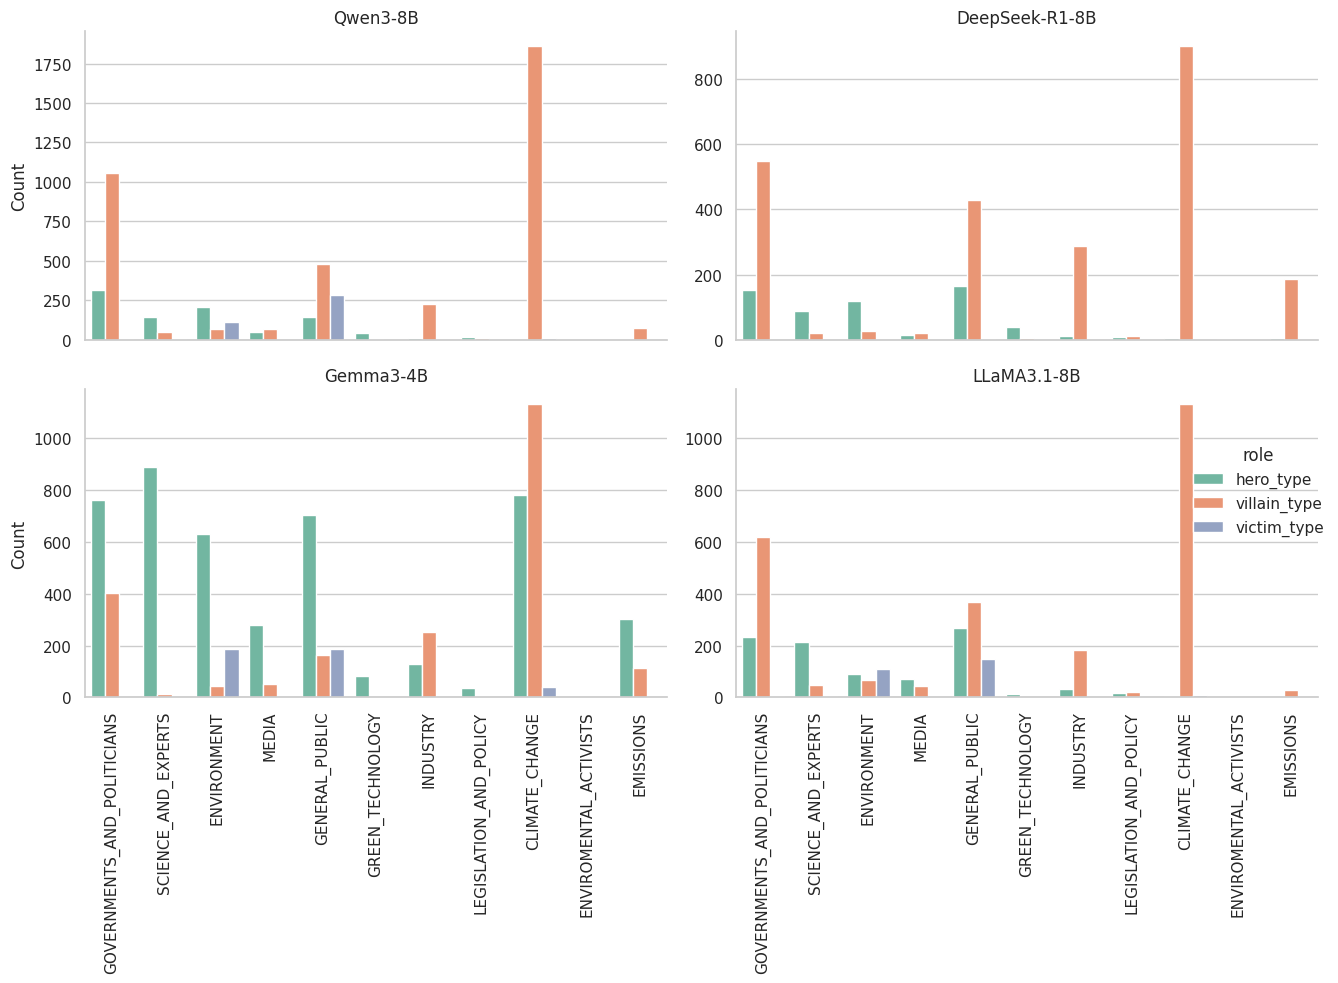

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add model labels
qwen_prebaked["model"] = "Qwen3-8B"
deepseek_prebaked["model"] = "DeepSeek-R1-8B"
gemma_prebaked["model"] = "Gemma3-4B"
lamma_prebaked["model"] = "LLaMA3.1-8B"

# Combine
df = pd.concat(
    [qwen_prebaked, deepseek_prebaked, gemma_prebaked, lamma_prebaked],
    ignore_index=True
)

# --- 3. Melt to long format ---
long_df = df.melt(
    id_vars=["tweetid", "model",'sentiment','clean_message'],  # ensure tweetid is included
    value_vars=["hero_type", "villain_type", "victim_type"],
    var_name="role",
    value_name="type"
)

import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid")

# Create catplot
g = sns.catplot(
    data=long_df,
    x="type",
    hue="role",          # color by role now
    col="model",         # one plot per model
    kind="count",
    height=5,
    aspect=1.2,
    sharey=False,
    palette="Set2",
    col_wrap=2           # 2x2 grid
)

# Titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")

# Rotate x-axis labels for readability
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()






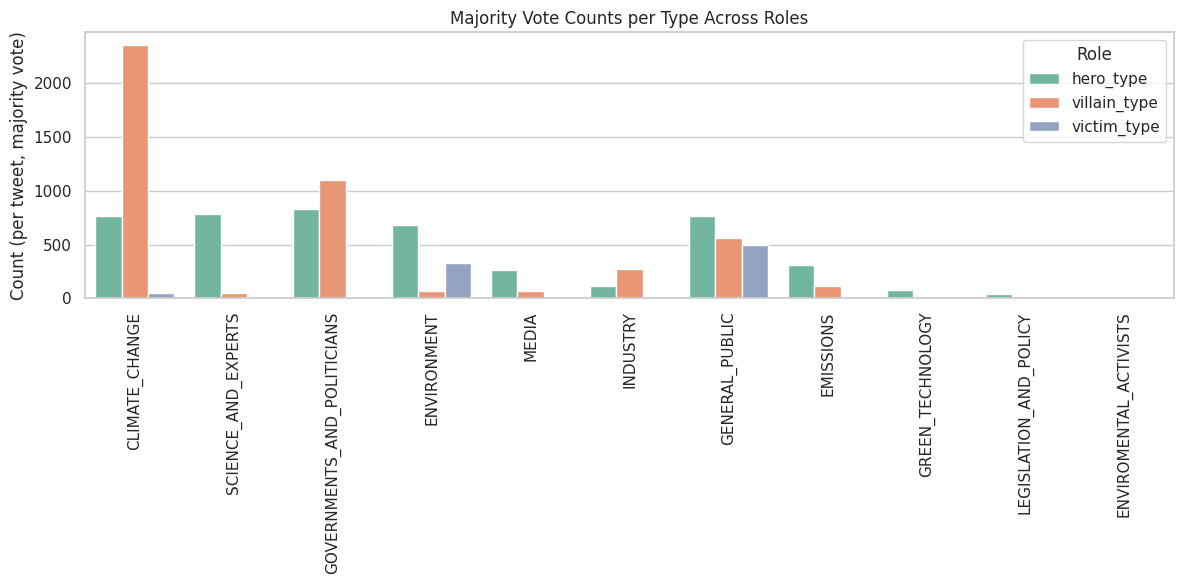

In [76]:
# Compute majority vote per tweet_id and role
# Treat None/NaN as valid
long_df["type"] = long_df["type"].where(long_df["type"].notna(), None)

# --- 4. Compute majority vote excluding None ---
def majority_vote(x):
    counts = x.value_counts(dropna=True)
    if len(counts):  # count None as a valid option
       return counts.idxmax()
    else:
      return None

majority_votes = (
    long_df.groupby(["tweetid", "role",'sentiment','clean_message'])["type"]
    .agg(majority_vote)
    .reset_index()
    .rename(columns={"type": "majority_type"})
).dropna()


# --- 5. Plot counts based on majority votes ---
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(
    data=majority_votes,
    x="majority_type",
    hue="role",
    palette="Set2"
)

plt.xlabel("")
plt.ylabel("Count (per tweet, majority vote)")
plt.xticks(rotation=90)
plt.title("Majority Vote Counts per Type Across Roles")
plt.legend(title="Role")
plt.tight_layout()
plt.show()


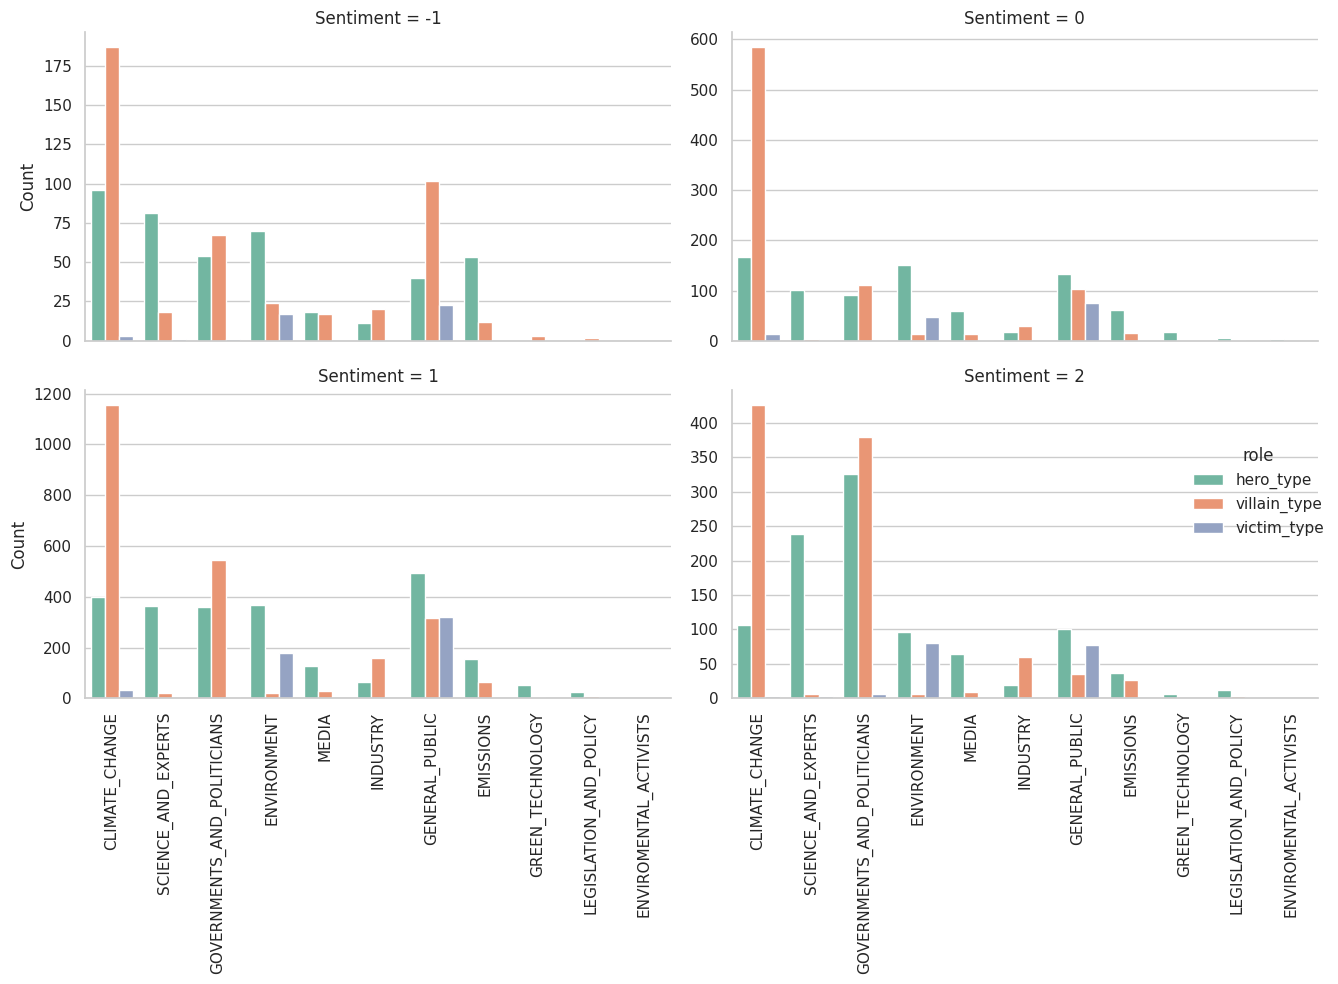

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Majority votes already computed ---
# majority_votes has columns: tweetid, role, sentiment, clean_message, majority_type

sns.set_theme(style="whitegrid")

# Use catplot to create one plot per sentiment
g = sns.catplot(
    data=majority_votes,
    x="majority_type",
    hue="role",
    col="sentiment",           # one plot per sentiment
    kind="count",
    col_wrap=2,                # 2x2 grid for 4 sentiments
    height=5,
    aspect=1.2,
    palette="Set2",
    sharey=False
)

# Titles and axis labels
g.set_titles("Sentiment = {col_name}")
g.set_axis_labels("", "Count")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)  # rotate x labels for readability

plt.tight_layout()
plt.show()

